In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
cifras = pd.read_csv('cifras.csv')
cifras

In [24]:
print(cifras['TLC_Con_GT'].head())


0    0
1    0
2    0
3    0
4    0
Name: TLC_Con_GT, dtype: int64


## ¿Qué países con TLC con Guatemala han mantenido aranceles máximos (AHS MaxRate) consistentemente bajos en los últimos 10 años?

In [26]:
TLC = ['Canada'
'Chile','Colombia','Costa Rica','Dominican Republic','El Salvador''Honduras',
'Mexico','Panama','Peru','South Korea','Taiwan','United States','Nicaragua' , 
'Israael' 'Switzerland', 'Norway','Iceland', 'Belize',
'Ecuador','Cuba','Trinidad and Tobago','Venezuela'
]

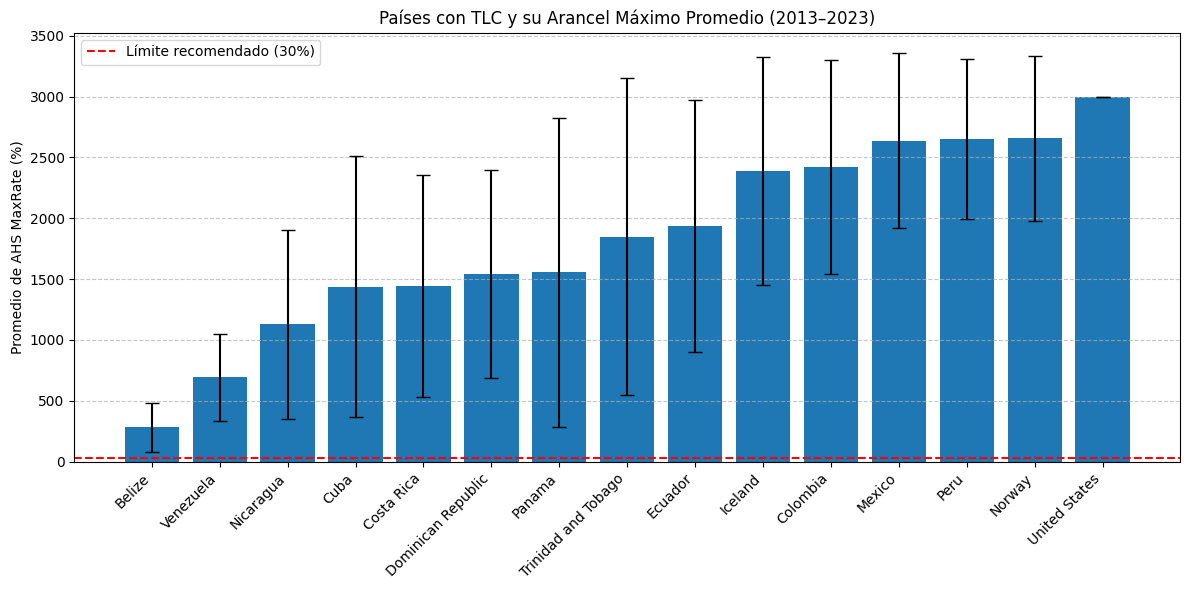

In [28]:
cifras['TLC_Con_GT'] = cifras['Partner Name'].isin(TLC).astype(int)

# Filtrar los datos para los últimos 10 años
cifras_reciente = cifras[cifras['Year'] >= 2013]

# Filtrar solo países con TLC
cifras_tlc = cifras_reciente[cifras_reciente['TLC_Con_GT'] == 1]

# Agrupar por país y calcular estadística de arancel máximo
tlc_stats = cifras_tlc.groupby('Partner Name')['AHS MaxRate (%)'].agg(['mean', 'std']).sort_values(by='mean')

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(tlc_stats.index, tlc_stats['mean'], yerr=tlc_stats['std'], capsize=5)
plt.axhline(30, color='red', linestyle='--', label='Límite recomendado (30%)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Promedio de AHS MaxRate (%)')
plt.title('Países con TLC y su Arancel Máximo Promedio (2013–2023)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

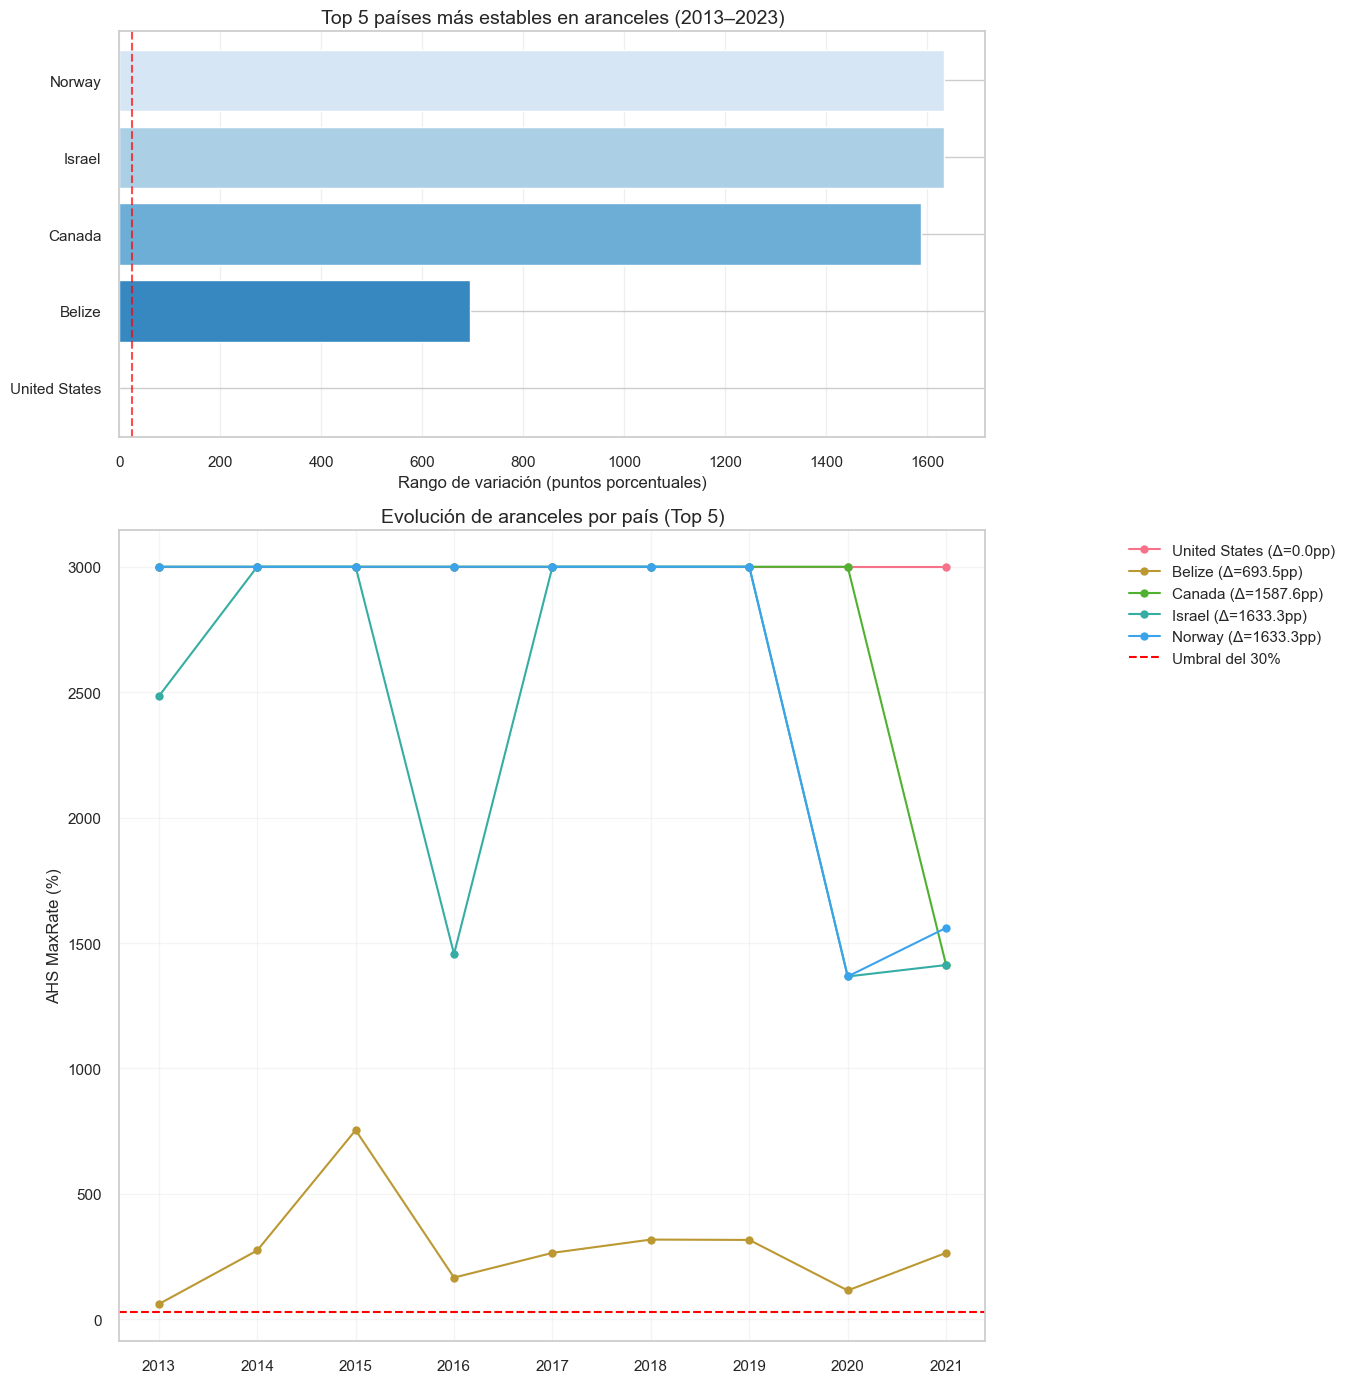

 RESUMEN EJECUTIVO:
• 0 de 22 países con TLC cumplen:
  - Variación <25 puntos porcentuales
  - Arancel <30% en ≥50% de los años

 Ningún país cumple ambos criterios.
 Mostramos el Top 5 más estables según los datos disponibles:

| País          |   Variación (%) |   Consistencia (%) |   Arancel promedio |
|:--------------|----------------:|-------------------:|-------------------:|
| United States |            0    |                  0 |           3000     |
| Belize        |          693.48 |                  0 |            281.737 |
| Canada        |         1587.6  |                  0 |           2823.6   |
| Israel        |         1633.26 |                  0 |           2413.2   |
| Norway        |         1633.26 |                  0 |           2658.59  |

 Tabla comparativa completa:
| País                |   Variación (%) |   Consistencia (%) |   Arancel promedio |
|:--------------------|----------------:|-------------------:|-------------------:|
| United States       |   

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.facecolor'] = 'white'


TLC_CON_GT = ['Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic',
              'El Salvador', 'Honduras', 'Mexico', 'Panama', 'Peru', 'South Korea',
              'Taiwan', 'United States', 'Nicaragua', 'Israel', 'Switzerland',
              'Norway', 'Iceland', 'Belize', 'Ecuador', 'Cuba', 'Trinidad and Tobago']

# Parámetros del análisis
UMBRAL_VARIACION = 25  
UMBRAL_CONSISTENCIA = 50  


cifras['TLC_Con_GT'] = cifras['Partner Name'].isin(TLC_CON_GT).astype(int)
cifras_recientes = cifras[cifras['Year'] >= 2013]
cifras_tlc = cifras_recientes[cifras_recientes['TLC_Con_GT'] == 1]


def analizar_aranceles(df):
    resultados = []
    for pais in TLC_CON_GT:
        datos_pais = df[df['Partner Name'] == pais]
        if not datos_pais.empty:
            aranceles = datos_pais['AHS MaxRate (%)']
            stats = {
                'País': pais,
                'Años analizados': len(aranceles),
                'Arancel promedio': aranceles.mean(),
                'Desviación estándar': aranceles.std(),
                'Máximo histórico': aranceles.max(),
                'Mínimo histórico': aranceles.min(),
                'Variación (%)': aranceles.max() - aranceles.min(),
                'Consistencia (%)': (aranceles[aranceles < 30].count() / len(aranceles)) * 100
            }
            resultados.append(stats)
    return pd.DataFrame(resultados)


resultados = analizar_aranceles(cifras_tlc)

# Filtro con umbrales
paises_estables = resultados[
    (resultados['Variación (%)'] < UMBRAL_VARIACION) &
    (resultados['Consistencia (%)'] >= UMBRAL_CONSISTENCIA)
].sort_values('Variación (%)')

# Para el top 5 aunque no cumplan los criterios
top5 = resultados.sort_values(by=['Consistencia (%)', 'Variación (%)'], ascending=[False, True]).head(5)


if not top5.empty:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), gridspec_kw={'height_ratios': [1, 2]})

    # Gráfico 1: Variación de aranceles
    ax1.barh(top5['País'], top5['Variación (%)'], color=sns.color_palette("Blues_r", len(top5)))
    ax1.set_title('Top 5 países más estables en aranceles (2013–2023)', fontsize=14)
    ax1.set_xlabel('Rango de variación (puntos porcentuales)')
    ax1.axvline(x=UMBRAL_VARIACION, color='red', linestyle='--', alpha=0.7)
    ax1.grid(axis='x', alpha=0.3)

    
    for _, row in top5.iterrows():
        pais = row['País']
        datos = cifras_tlc[cifras_tlc['Partner Name'] == pais]
        ax2.plot(datos['Year'], datos['AHS MaxRate (%)'], 'o-', label=f"{pais} (Δ={row['Variación (%)']:.1f}pp)")
    ax2.axhline(30, color='red', linestyle='--', label='Umbral del 30%')
    ax2.set_title('Evolución de aranceles por país (Top 5)', fontsize=14)
    ax2.set_ylabel('AHS MaxRate (%)')
    ax2.legend(bbox_to_anchor=(1.15, 1))
    ax2.grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show()
else:
    print(" No se generan gráficos porque no hay países con datos suficientes.")



print(" RESUMEN EJECUTIVO:")
print(f"• {len(paises_estables)} de {len(TLC_CON_GT)} países con TLC cumplen:")
print(f"  - Variación <{UMBRAL_VARIACION} puntos porcentuales")
print(f"  - Arancel <30% en ≥{UMBRAL_CONSISTENCIA}% de los años\n")

if not paises_estables.empty:
    print(" Países que cumplen los criterios:")
    print(paises_estables[['País', 'Variación (%)', 'Consistencia (%)', 'Arancel promedio']].to_markdown(index=False))
else:
    print(" Ningún país cumple ambos criterios.")
    print(" Mostramos el Top 5 más estables según los datos disponibles:\n")
    print(top5[['País', 'Variación (%)', 'Consistencia (%)', 'Arancel promedio']].to_markdown(index=False))


print("\n Tabla comparativa completa:")
print(resultados[['País', 'Variación (%)', 'Consistencia (%)', 'Arancel promedio']].sort_values(
    ['Consistencia (%)', 'Variación (%)'], ascending=[False, True]
).to_markdown(index=False))


## ¿Existe una relación entre el crecimiento económico de un país (Country Growth (%)) y su volumen de importaciones de productos guatemaltecos (Import (US$ Thousand))?

Coeficiente de correlación: -0.1093


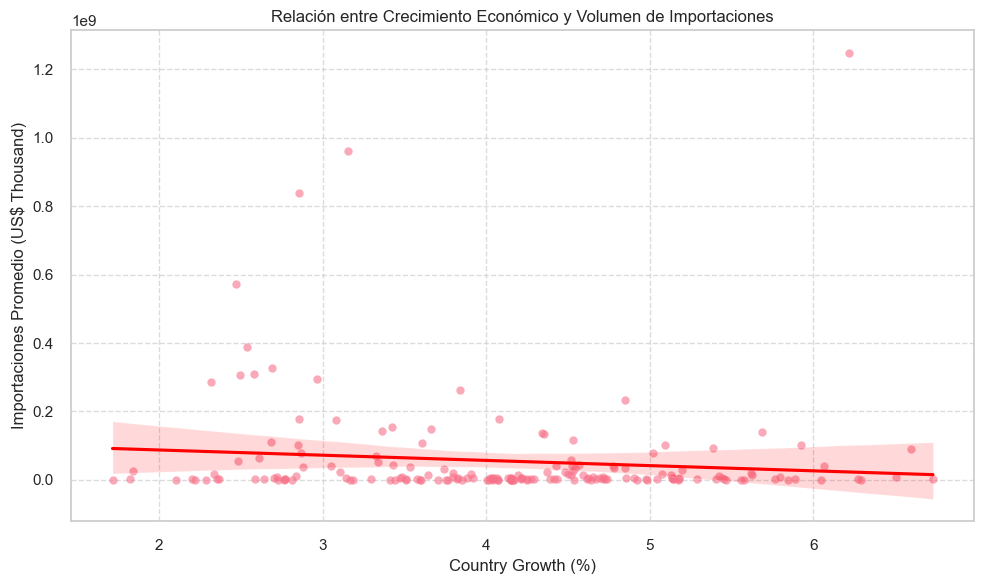

In [49]:
# Agrupar por país y calcular promedio de Importaciones y Crecimiento Económico
growth_vs_import = cifras.groupby('Partner Name')[['Import (US$ Thousand)', 'Country Growth (%)']].mean().dropna()

# Calcular correlación
correlacion = growth_vs_import['Import (US$ Thousand)'].corr(growth_vs_import['Country Growth (%)'])
print(f"Coeficiente de correlación: {correlacion:.4f}")

# Visualización con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=growth_vs_import,
    x='Country Growth (%)',
    y='Import (US$ Thousand)',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Relación entre Crecimiento Económico y Volumen de Importaciones')
plt.xlabel('Country Growth (%)')
plt.ylabel('Importaciones Promedio (US$ Thousand)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra la relación entre el crecimiento económico promedio de cada país y su volumen promedio de importaciones desde 1989. El coeficiente de correlación obtenido indica no necesariamente existe una relación lineal entre estas variables. Un valor negativo sugiere que países con menor crecimiento tienden a importar más, lo cual es un indicador favorable para Guatemala al buscar mercados dinámicos. Sin embargo, la correlación no implica causalidad directa, por lo que debe interpretarse con cautela.

##  ¿Qué continentes presentan el mejor balance entre bajo arancel promedio (AHS Simple Average (%)) y crecimiento económico (Country Growth (%)) para exportaciones guatemaltecas?

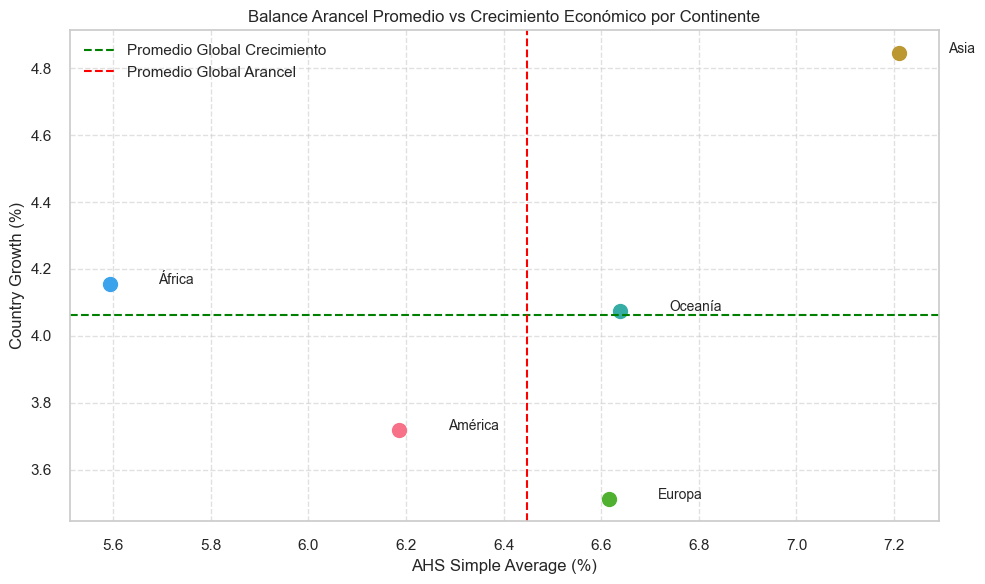

In [50]:
# Agrupación por continente con promedios
continente_stats = cifras.groupby('Continente')[['AHS Simple Average (%)', 'Country Growth (%)']].mean().dropna()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
for i in range(len(continente_stats)):
    x = continente_stats['AHS Simple Average (%)'].iloc[i]
    y = continente_stats['Country Growth (%)'].iloc[i]
    label = continente_stats.index[i]
    plt.scatter(x, y, s=100)
    plt.text(x + 0.1, y, label, fontsize=10)

# Líneas de referencia
plt.axhline(y=continente_stats['Country Growth (%)'].mean(), color='green', linestyle='--', label='Promedio Global Crecimiento')
plt.axvline(x=continente_stats['AHS Simple Average (%)'].mean(), color='red', linestyle='--', label='Promedio Global Arancel')

plt.xlabel('AHS Simple Average (%)')
plt.ylabel('Country Growth (%)')
plt.title('Balance Arancel Promedio vs Crecimiento Económico por Continente')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Este gráfico compara el arancel promedio y el crecimiento económico de cada continente. Los cuadrantes ayudan a visualizar qué regiones presentan condiciones más favorables para exportaciones guatemaltecas:


Cuadrante inferior derecho: ideal (bajo arancel, alto crecimiento).


Cuadrante superior derecho: alto crecimiento pero también barreras.


Cuadrante inferior izquierdo: condiciones estables.

Estos datos pueden ayudar a AGEXPORT a priorizar regiones antes de decidir sobre países individuales.